In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

run=50
t=300
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]

# True number of bursts

## Number of bursts happening at any given time
This is the number of bursts that are physically happening at any given time during the simulation, specifically 
the times at which we want to observe

In [54]:
values50table_2week=ascii.read('/home/lee/data/cluster_size_change/100x_burst/values50_2week')
burst_total50_2week=values50table_2week['burst_total'] 
burst_fraction50_2week=values50table_2week['burst_number'] 

values100table_2week=ascii.read('/home/lee/data/cluster_size_change/100x_burst/values100_2week')
burst_total100_2week=values100table_2week['burst_total'] 
burst_fraction100_2week=values100table_2week['burst_number'] 

values500table_2week=ascii.read('/home/lee/data/cluster_size_change/100x_burst/values500_2week')
burst_total500_2week=values500table_2week['burst_total'] 
burst_fraction500_2week=values500table_2week['burst_number'] 

values1000table_2week=ascii.read('/home/lee/data/cluster_size_change/100x_burst/values1000_2week')
burst_total1000_2week=values1000table_2week['burst_total'] 
burst_fraction1000_2week=values1000table_2week['burst_number'] 

values2000table_2week=ascii.read('/home/lee/data/cluster_size_change/100x_burst/values2000_2week')
burst_total2000_2week=values2000table_2week['burst_total'] 
burst_fraction2000_2week=values2000table_2week['burst_number'] 

values5000table_2week=ascii.read('/home/lee/data/cluster_size_change/100x_burst/values5000_2week')
burst_total5000_2week=values5000table_2week['burst_total'] 
burst_fraction5000_2week=values5000table_2week['burst_number'] 

In [55]:
cadence_num_bursts50_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts50_2week.append(burst_fraction50_2week[i][j])
        
cadence_num_bursts100_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts100_2week.append(burst_fraction100_2week[i][j])
        
cadence_num_bursts500_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts500_2week.append(burst_fraction500_2week[i][j])
        
cadence_num_bursts1000_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts1000_2week.append(burst_fraction1000_2week[i][j])
        
cadence_num_bursts2000_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts2000_2week.append(burst_fraction2000_2week[i][j])

cadence_num_bursts5000_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts5000_2week.append(burst_fraction5000_2week[i][j])

print((cadence_num_bursts5000_2week[1]))

42


## remove zeros

In [56]:
num_new50_time=[]
num_new100_time=[]
num_new500_time=[]
num_new1000_time=[]
num_new2000_time=[]
num_new5000_time=[]
for i in range(len(cadence_num_bursts50_2week)):
    if cadence_num_bursts50_2week[i]!=0:
        num_new50_time.append(cadence_num_bursts50_2week[i])
        
for i in range(len(cadence_num_bursts100_2week)):
    if cadence_num_bursts100_2week[i]!=0:
        num_new100_time.append(cadence_num_bursts100_2week[i])
        
for i in range(len(cadence_num_bursts500_2week)):
    if cadence_num_bursts500_2week[i]!=0:
        num_new500_time.append(cadence_num_bursts500_2week[i])
        
for i in range(len(cadence_num_bursts1000_2week)):
    if cadence_num_bursts1000_2week[i]!=0:
        num_new1000_time.append(cadence_num_bursts1000_2week[i])
        
for i in range(len(cadence_num_bursts2000_2week)):
    if cadence_num_bursts2000_2week[i]!=0:
        num_new2000_time.append(cadence_num_bursts2000_2week[i])
        
for i in range(len(cadence_num_bursts5000_2week)):
    if cadence_num_bursts5000_2week[i]!=0:
        num_new5000_time.append(cadence_num_bursts5000_2week[i])

[]

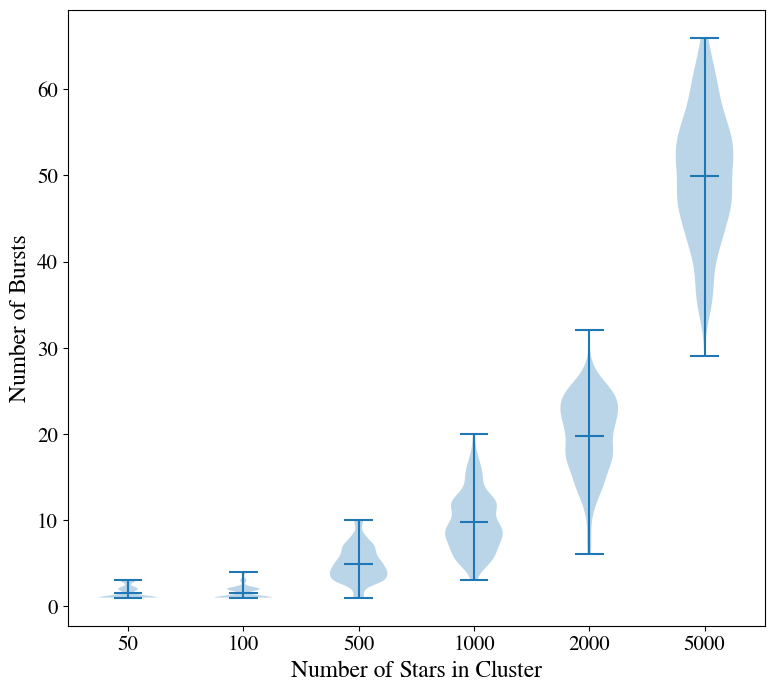

In [57]:
data_num_2week=[num_new50_time,num_new100_time,num_new500_time,\
                num_new1000_time,num_new2000_time,num_new5000_time]

labels=[50,100,500,1000,2000,5000]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax.violinplot(data_num_2week,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',fontsize=17)
ax.set_ylabel('Number of Bursts',fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#ax.set_title('Number of 100x Burst for Different Cluster Sizes (Any Time)',fontsize=15)
plt.plot()

In [58]:
C50=np.load('/home/lee/data/cluster_size_change/100x_burst/C50.npy')

cluster_size50=50
cad_C50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for j in range(cluster_size50):
        for k in range(len(t_list_cadence)):
                cad_C50[i,j,k]=C50[i,j,t_list_cadence[k]]

num50=0
num50_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size50):
            if cad_C50[i,k,j]==100:
                num50+=1
        num50_list.append(num50)
        num50=0

## Number of bursts that are happening during an entire observing program
This is the number of bursts physically happening during our observing program, taking only the data from the dates
in which we would like to observe the cluster 

## 50 stars

In [2]:
burst50=np.load('/home/lee/data/cluster_size_change/100x_burst/burst50.npy')
L50=np.load('/home/lee/data/cluster_size_change/100x_burst/L50.npy')
C50=np.load('/home/lee/data/cluster_size_change/100x_burst/C50.npy')
N50=np.load('/home/lee/data/cluster_size_change/100x_burst/final_50_1.npy')

In [60]:
cluster_size50=50
cad_C50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for j in range(cluster_size50):
        for k in range(len(t_list_cadence)):
                cad_C50[i,j,k]=C50[i,j,t_list_cadence[k]]

In [61]:
print(np.shape(cad_C50))

(50, 50, 12)


In [96]:
num50=0
num50_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size50):
            if cad_C50[i,k,j]==100 and cad_C50[i,k,j]!=cad_C50[i,k,j-1]:
                num50+=1
            elif cad_C50[i,k,j-1]==100 and cad_C50[i,k,j]!=cad_C50[i,k,j-1]:
                num50+=1
    num50_list.append(num50)
    num50=0

In [97]:
print(num50_list)

[2, 0, 1, 0, 1, 0, 3, 1, 2, 2, 0, 3, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2]


## 100 stars

In [64]:
burst100=np.load('/home/lee/data/cluster_size_change/100x_burst/burst100.npy')
L100=np.load('/home/lee/data/cluster_size_change/100x_burst/L100.npy')
C100=np.load('/home/lee/data/cluster_size_change/100x_burst/C100.npy')

In [65]:
cluster_size100=100
cad_C100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for j in range(cluster_size100):
        for k in range(len(t_list_cadence)):
                cad_C100[i,j,k]=C100[i,j,t_list_cadence[k]]

In [98]:
num100=0
num100_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size100):
            if cad_C100[i,k,j]==100 and cad_C100[i,k,j]!=cad_C100[i,k,j-1]:
                num100+=1
            elif cad_C100[i,k,j-1]==100 and cad_C100[i,k,j]!=cad_C100[i,k,j-1]:
                num100+=1
    num100_list.append(num100)
    num100=0

In [99]:
print(num100_list)

[1, 3, 1, 0, 2, 0, 1, 0, 1, 1, 3, 1, 1, 0, 0, 1, 2, 0, 3, 6, 0, 2, 3, 1, 2, 2, 2, 0, 1, 2, 4, 2, 4, 3, 0, 1, 1, 2, 2, 2, 1, 2, 5, 0, 3, 1, 1, 0, 2, 2]


## 500 stars

In [68]:
burst500=np.load('/home/lee/data/cluster_size_change/100x_burst/burst500.npy')
L500=np.load('/home/lee/data/cluster_size_change/100x_burst/L500.npy')
C500=np.load('/home/lee/data/cluster_size_change/100x_burst/C500.npy')

In [69]:
cluster_size500=500
cad_C500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for j in range(cluster_size500):
        for k in range(len(t_list_cadence)):
                cad_C500[i,j,k]=C500[i,j,t_list_cadence[k]]

In [100]:
num500=0
num500_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size500):
            if cad_C500[i,k,j]==100 and cad_C500[i,k,j]!=cad_C500[i,k,j-1]:
                num500+=1
            elif cad_C500[i,k,j-1]==100 and cad_C500[i,k,j]!=cad_C500[i,k,j-1]:
                num500+=1
    num500_list.append(num500)
    num500=0

In [101]:
print(num500_list)

[10, 8, 7, 9, 10, 11, 9, 7, 10, 13, 6, 11, 10, 11, 12, 8, 10, 7, 9, 7, 11, 9, 5, 9, 11, 6, 12, 9, 7, 4, 10, 8, 8, 10, 6, 6, 5, 10, 9, 6, 5, 11, 5, 4, 7, 2, 2, 10, 9, 8]


## 1000 stars

In [72]:
burst1000=np.load('/home/lee/data/cluster_size_change/100x_burst/burst1000.npy')
L1000=np.load('/home/lee/data/cluster_size_change/100x_burst/L1000.npy')
C1000=np.load('/home/lee/data/cluster_size_change/100x_burst/C1000.npy')

In [73]:
cluster_size1000=1000
cad_C1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
                cad_C1000[i,j,k]=C1000[i,j,t_list_cadence[k]]

In [102]:
num1000=0
num1000_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if cad_C1000[i,k,j]==100 and cad_C1000[i,k,j]!=cad_C1000[i,k,j-1]:
                num1000+=1
            if cad_C1000[i,k,j-1]==100 and cad_C1000[i,k,j]!=cad_C1000[i,k,j-1]:
                num1000+=1
    num1000_list.append(num1000)
    num1000=0

In [103]:
print(num1000_list)

[20, 19, 24, 12, 18, 15, 11, 15, 9, 10, 20, 15, 13, 16, 21, 20, 16, 15, 22, 11, 18, 16, 15, 26, 22, 12, 11, 9, 14, 10, 10, 11, 13, 18, 18, 17, 20, 22, 14, 15, 21, 14, 18, 16, 12, 13, 16, 14, 20, 23]


## 2000 stars

In [76]:
burst2000=np.load('/home/lee/data/cluster_size_change/100x_burst/burst2000.npy')
L2000=np.load('/home/lee/data/cluster_size_change/100x_burst/L2000.npy')
C2000=np.load('/home/lee/data/cluster_size_change/100x_burst/C2000.npy')

In [77]:
cluster_size2000=2000
cad_C2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
                cad_C2000[i,j,k]=C2000[i,j,t_list_cadence[k]]

In [104]:
num2000=0
num2000_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size2000):
            if cad_C2000[i,k,j]==100 and cad_C2000[i,k,j]!=cad_C2000[i,k,j-1]:
                num2000+=1
            elif cad_C2000[i,k,j-1]==100 and cad_C2000[i,k,j]!=cad_C2000[i,k,j-1]:
                num2000+=1
    num2000_list.append(num2000)
    num2000=0

In [79]:
print(num2000_list)

[17, 14, 13, 16, 19, 20, 16, 9, 14, 23, 13, 21, 22, 19, 23, 21, 13, 13, 8, 13, 20, 11, 17, 18, 14, 9, 17, 17, 17, 11, 14, 21, 12, 18, 12, 19, 18, 10, 17, 19, 19, 7, 20, 15, 17, 15, 20, 14, 16, 20]


## 5000 stars

In [80]:
burst5000=np.load('/home/lee/data/cluster_size_change/100x_burst/burst5000.npy')
L5000=np.load('/home/lee/data/cluster_size_change/100x_burst/L5000.npy')
C5000=np.load('/home/lee/data/cluster_size_change/100x_burst/C5000.npy')

In [81]:
cluster_size5000=5000
cad_C5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for j in range(cluster_size5000):
        for k in range(len(t_list_cadence)):
                cad_C5000[i,j,k]=C5000[i,j,t_list_cadence[k]]

In [105]:
num5000=0
num5000_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size5000):
            if cad_C5000[i,k,j]==100 and cad_C5000[i,k,j]!=cad_C5000[i,k,j-1]:
                num5000+=1
            elif cad_C5000[i,k,j-1]==100 and cad_C5000[i,k,j]!=cad_C5000[i,k,j-1]:
                num5000+=1
    num5000_list.append(num5000)
    num5000=0

In [83]:
print(num5000_list)

[38, 45, 48, 44, 44, 47, 38, 46, 46, 33, 48, 31, 39, 32, 51, 38, 36, 46, 42, 33, 31, 32, 40, 53, 28, 35, 49, 39, 53, 33, 33, 34, 48, 47, 47, 46, 39, 37, 46, 48, 51, 50, 47, 42, 31, 41, 41, 32, 46, 54]


## log scale

In [84]:
num_new50=[]
num_new100=[]
num_new500=[]
num_new1000=[]
num_new2000=[]
num_new5000=[]
for i in range(len(num50_list)):
    if num50_list[i]!=0:
        num_new50.append(num50_list[i])
        
for i in range(len(num100_list)):
    if num100_list[i]!=0:
        num_new100.append(num100_list[i])
        
for i in range(len(num500_list)):
    if num500_list[i]!=0:
        num_new500.append(num500_list[i])
        
for i in range(len(num1000_list)):
    if num1000_list[i]!=0:
        num_new1000.append(num1000_list[i])
        
for i in range(len(num2000_list)):
    if num2000_list[i]!=0:
        num_new2000.append(num2000_list[i])
        
for i in range(len(num5000_list)):
    if num5000_list[i]!=0:
        num_new5000.append(num5000_list[i])

In [85]:
data_num=[num_new50,num_new100,num_new500,num_new1000,num_new2000,num_new5000]

In [86]:
print(np.mean(num_new5000))

41.56


[]

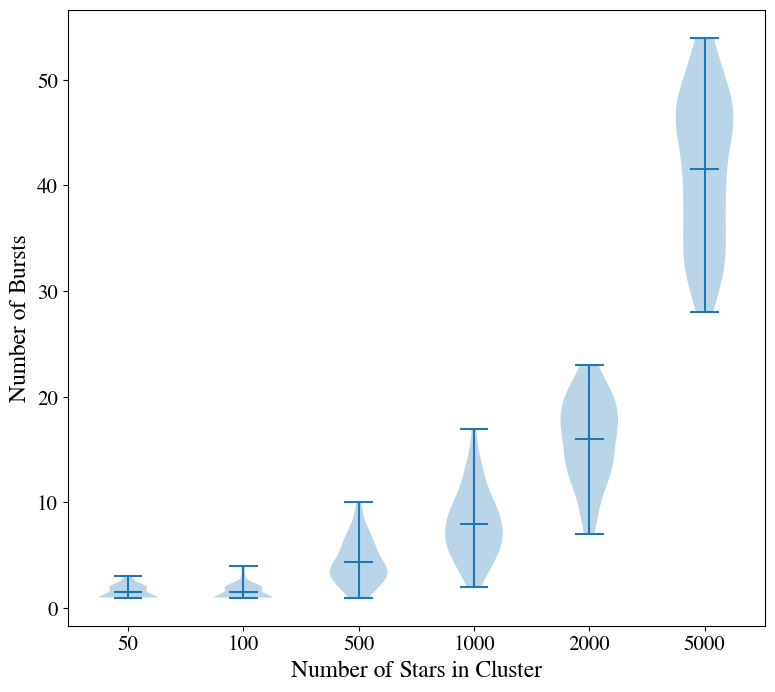

In [87]:
labels=[50,100,500,1000,2000,5000]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax.violinplot(data_num,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',fontsize=17)
ax.set_ylabel('Number of Bursts',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

#ax.set_title('Number of 100x Bursts for Different Cluster Sizes (Entire Observing Program)',fontsize=14)
plt.plot()

## stack the plots

/tmp/ipykernel_103627/577474224.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
/tmp/ipykernel_103627/577474224.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['0','50','100','500','1000','2000','5000'])


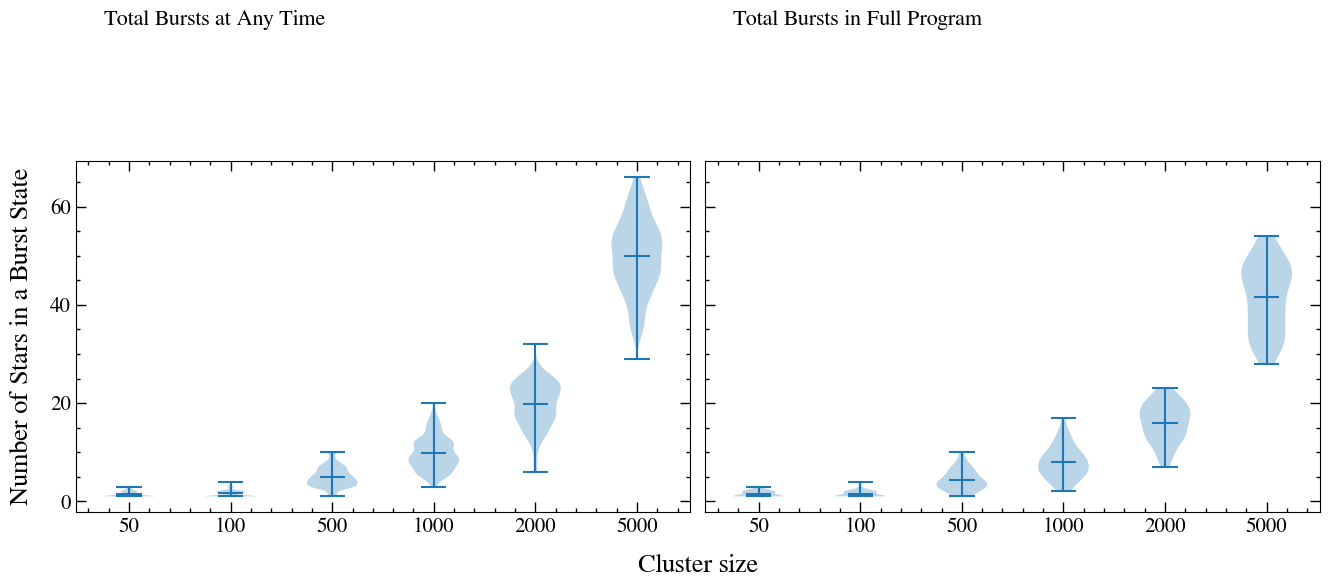

In [88]:
fig,((ax1,ax2))=plt.subplots(1,2,sharey='row',sharex='row')
fig.set_size_inches(13,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax1.violinplot(data_num_2week,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax2.violinplot(data_num,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax1.text(0.75,97,'Total Bursts at Any Time',fontsize=16)
ax2.text(0.75,97,'Total Bursts in Full Program',fontsize=16)

#ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=False,top=False,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
#ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
#ax2.minorticks_on()
ax2.locator_params(axis='y',nbins=6)
#ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
#ax2.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

fig.tight_layout()
#plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])

ax3=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax3.set_yticks([])
ax3.set_xticks([])
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax2.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax3.set_ylabel(r'Number of Stars in a Burst State',fontsize=19,labelpad=30)
ax3.set_xlabel('Cluster size',fontsize=19,labelpad=30)

ax1.minorticks_on()
#ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)
ax2.minorticks_on()
#ax2.locator_params(axis='y',nbins=6)
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)

#ax1.set_yscale('log')
#ax2.set_yscale('log')

#plt.savefig('/home/lee/research/figs/SizeChange/violinplots/number/observing_runTrue_100x_SidexSide.jpeg',dpi=300,bbox_inches='tight')
plt.show()

# Observational capabilities

## Number of bursts at any given time

This is the number of bursts that we can physical detect based on observations

## 50 stars

In [2]:
L50=np.load('/home/lee/data/cluster_size_change/100x_burst/L50.npy')

cluster_size50=50
cad_L50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for j in range(cluster_size50):
        for k in range(len(t_list_cadence)):
                cad_L50[i,j,k]=L50[i,j,t_list_cadence[k]]

obs_burst50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for k in range(cluster_size50):
        for j in range(1,12):
            if cad_L50[i,k,j]-cad_L50[i,k,j-1]==5:
                    obs_burst50[i,k,j-30:j]=100
            elif cad_L50[i,k,j-1]-cad_L50[i,k,j]==5:
                    obs_burst50[i,k,j:j+30]=100

num100_50=0
list100_50=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size50):
            if obs_burst50[i,k,j]==100:
                num100_50+=1
        list100_50.append(num100_50)
        num100_50=0

num100_50_total=0
list100_50_total=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size50):
            if obs_burst50[i,k,j]==100 and obs_burst50[i,k,j]!=obs_burst50[i,k,j-1]:
                num100_50_total+=1
            elif obs_burst50[i,k,j-1]==100 and obs_burst50[i,k,j]!=obs_burst50[i,k,j-1]:
                num100_50_total+=1
    list100_50_total.append(num100_50_total)
    num100_50_total=0

In [3]:
print(list100_50)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 

## 100 stars

In [4]:
L100=np.load('/home/lee/data/cluster_size_change/100x_burst/L100.npy')

cluster_size100=100
cad_L100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for j in range(cluster_size100):
        for k in range(len(t_list_cadence)):
                cad_L100[i,j,k]=L100[i,j,t_list_cadence[k]]

obs_burst100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for k in range(cluster_size100):
        for j in range(1,12):
            if cad_L100[i,k,j]-cad_L100[i,k,j-1]==5:
                    obs_burst100[i,k,j-30:j]=100
            elif cad_L100[i,k,j-1]-cad_L100[i,k,j]==5:
                    obs_burst100[i,k,j:j+30]=100

num100_100=0
list100_100=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size100):
            if obs_burst100[i,k,j]==100:
                num100_100+=1
        list100_100.append(num100_100)
        num100_100=0

num100_100_total=0
list100_100_total=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size100):
            if obs_burst100[i,k,j]==100 and obs_burst100[i,k,j]!=obs_burst100[i,k,j-1]:
                num100_100_total+=1
            elif obs_burst100[i,k,j-1]==100 and obs_burst100[i,k,j]!=obs_burst100[i,k,j-1]:
                num100_100_total+=1
    list100_100_total.append(num100_100_total)
    num100_100_total=0

## 500 stars

In [5]:
L500=np.load('/home/lee/data/cluster_size_change/100x_burst/L500.npy')

cluster_size500=500
cad_L500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for j in range(cluster_size500):
        for k in range(len(t_list_cadence)):
                cad_L500[i,j,k]=L500[i,j,t_list_cadence[k]]


obs_burst500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for k in range(cluster_size500):
        for j in range(1,12):
            if cad_L500[i,k,j]-cad_L500[i,k,j-1]==5:
                    obs_burst500[i,k,j-30:j]=100
            elif cad_L500[i,k,j-1]-cad_L500[i,k,j]==5:
                    obs_burst500[i,k,j:j+30]=100

num100_500=0
list100_500=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size500):
            if obs_burst500[i,k,j]==100:
                num100_500+=1
        list100_500.append(num100_500)
        num100_500=0

num100_500_total=0
list100_500_total=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size500):
            if obs_burst500[i,k,j]==100 and obs_burst500[i,k,j]!=obs_burst500[i,k,j-1]:
                num100_500_total+=1
            elif obs_burst500[i,k,j-1]==100 and obs_burst500[i,k,j]!=obs_burst500[i,k,j-1]:
                num100_500_total+=1
    list100_500_total.append(num100_500_total)
    num100_500_total=0

## 1000 stars

In [6]:
L1000=np.load('/home/lee/data/cluster_size_change/100x_burst/L1000.npy')

cluster_size1000=1000
cad_L1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
                cad_L1000[i,j,k]=L1000[i,j,t_list_cadence[k]]

obs_burst1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for k in range(cluster_size1000):
        for j in range(1,12):
            if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==5:
                    obs_burst1000[i,k,j-30:j]=100
            elif cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==5:
                    obs_burst1000[i,k,j:j+30]=100

num100_1000=0
list100_1000=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if obs_burst1000[i,k,j]==100:
                num100_1000+=1
        list100_1000.append(num100_1000)
        num100_1000=0

num100_1000_total=0
list100_1000_total=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if obs_burst1000[i,k,j]==100 and obs_burst1000[i,k,j]!=obs_burst1000[i,k,j-1]:
                num100_1000_total+=1
            elif obs_burst1000[i,k,j-1]==100 and obs_burst1000[i,k,j]!=obs_burst1000[i,k,j-1]:
                num100_1000_total+=1
    list100_1000_total.append(num100_1000_total)
    num100_1000_total=0

## 2000 stars

In [7]:
L2000=np.load('/home/lee/data/cluster_size_change/100x_burst/L2000.npy')

cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
                cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==5:
                    obs_burst2000[i,k,j-30:j]=100
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==5:
                    obs_burst2000[i,k,j:j+30]=100

num100_2000=0
list100_2000=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size2000):
            if obs_burst2000[i,k,j]==100:
                num100_2000+=1
        list100_2000.append(num100_2000)
        num100_2000=0

num100_2000_total=0
list100_2000_total=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size2000):
            if obs_burst2000[i,k,j]==100 and obs_burst2000[i,k,j]!=obs_burst2000[i,k,j-1]:
                num100_2000_total+=1
            if obs_burst2000[i,k,j-1]==100 and obs_burst2000[i,k,j]!=obs_burst2000[i,k,j-1]:
                num100_2000_total+=1
    list100_2000_total.append(num100_2000_total)
    num100_2000_total=0

## 5000 stars

In [8]:
L5000=np.load('/home/lee/data/cluster_size_change/100x_burst/L5000.npy')

cluster_size5000=5000
cad_L5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for j in range(cluster_size5000):
        for k in range(len(t_list_cadence)):
                cad_L5000[i,j,k]=L5000[i,j,t_list_cadence[k]]

obs_burst5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for k in range(cluster_size5000):
        for j in range(1,12):
            if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==5:
                    obs_burst5000[i,k,j-30:j]=100
            elif cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==5:
                    obs_burst5000[i,k,j:j+30]=100

num100_5000=0
list100_5000=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size5000):
            if obs_burst5000[i,k,j]==100:
                num100_5000+=1
        list100_5000.append(num100_5000)
        num100_5000=0

num100_5000_total=0
list100_5000_total=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size5000):
            if obs_burst5000[i,k,j]==100 and obs_burst5000[i,k,j]!=obs_burst5000[i,k,j-1]:
                num100_5000_total+=1
            elif obs_burst5000[i,k,j-1]==100 and obs_burst5000[i,k,j]!=obs_burst5000[i,k,j-1]:
                num100_5000_total+=1
    list100_5000_total.append(num100_5000_total)
    num100_5000_total=0

In [9]:
print(np.max(list100_5000_total))

96


## remove zeros

In [10]:
list100_50_new=[]
list100_100_new=[]
list100_500_new=[]
list100_1000_new=[]
list100_2000_new=[]
list100_5000_new=[]
for i in range(len(list100_50)):
    if list100_50[i]!=0:
        list100_50_new.append(list100_50[i])
        
for i in range(len(list100_100)):
    if list100_100[i]!=0:
        list100_100_new.append(list100_100[i])
        
for i in range(len(list100_500)):
    if list100_500[i]!=0:
        list100_500_new.append(list100_500[i])
        
for i in range(len(list100_1000)):
    if list100_1000[i]!=0:
        list100_1000_new.append(list100_1000[i])
        
for i in range(len(list100_2000)):
    if list100_2000[i]!=0:
        list100_2000_new.append(list100_2000[i])
        
for i in range(len(list100_5000)):
    if list100_5000[i]!=0:
        list100_5000_new.append(list100_5000[i])

In [11]:
print(list100_2000_new)

[16, 16, 16, 16, 15, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 15, 15, 13, 13, 13, 14, 14, 11, 10, 11, 11, 12, 12, 12, 12, 14, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 15, 16, 15, 15, 16, 16, 17, 18, 17, 18, 18, 14, 15, 15, 15, 15, 15, 14, 14, 14, 14, 16, 8, 9, 9, 9, 8, 8, 7, 6, 6, 7, 7, 16, 17, 17, 17, 16, 16, 16, 16, 15, 14, 14, 19, 20, 19, 20, 19, 20, 20, 20, 21, 23, 22, 16, 16, 15, 14, 14, 13, 13, 13, 14, 14, 13, 15, 15, 16, 16, 17, 17, 18, 18, 18, 19, 19, 19, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 15, 15, 14, 17, 17, 17, 17, 17, 17, 18, 19, 25, 25, 25, 25, 25, 26, 26, 25, 22, 23, 23, 20, 20, 19, 19, 20, 20, 20, 20, 20, 20, 20, 14, 14, 14, 14, 15, 15, 14, 14, 14, 13, 12, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 13, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 14, 13, 13, 12, 12, 12, 12, 12, 12, 13, 13, 17, 17, 19, 19, 19, 18, 18, 19, 19, 18, 18, 11, 11, 11, 12, 12, 12, 12, 11, 10, 9, 9, 11, 12, 13, 13, 13, 12, 12, 12, 12, 13, 14, 17, 17, 17,

## plot the single time numbers 

[]

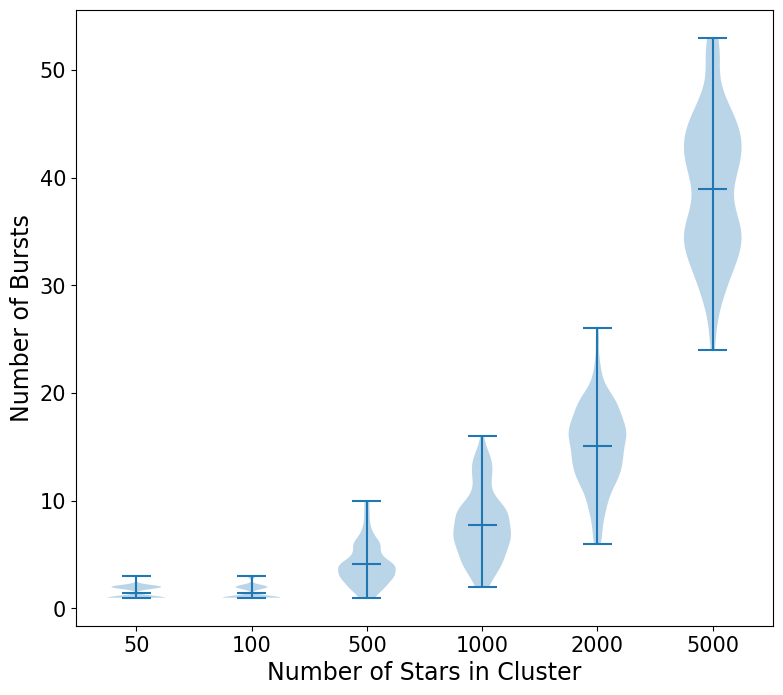

In [12]:
data_num_time=[list100_50_new,list100_100_new,list100_500_new,\
                list100_1000_new,list100_2000_new,list100_5000_new]

labels=[50,100,500,1000,2000,5000]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax.violinplot(data_num_time,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',fontsize=17)
ax.set_ylabel('Number of Bursts',fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#ax.set_title('Number of 100x Burst for Different Cluster Sizes (Any Time)',fontsize=15)
plt.plot()

In [13]:
num_new50_full=[]
num_new100_full=[]
num_new500_full=[]
num_new1000_full=[]
num_new2000_full=[]
num_new5000_full=[]
for i in range(len(list100_50_total)):
    if list100_50_total[i]!=0:
        num_new50_full.append(list100_50_total[i])
        
for i in range(len(list100_100_total)):
    if list100_100_total[i]!=0:
        num_new100_full.append(list100_100_total[i])
        
for i in range(len(list100_500_total)):
    if list100_500_total[i]!=0:
        num_new500_full.append(list100_500_total[i])
        
for i in range(len(list100_1000_total)):
    if list100_1000_total[i]!=0:
        num_new1000_full.append(list100_1000_total[i])
        
for i in range(len(list100_2000_total)):
    if list100_2000_total[i]!=0:
        num_new2000_full.append(list100_2000_total[i])
        
for i in range(len(list100_5000_total)):
    if list100_5000_total[i]!=0:
        num_new5000_full.append(list100_5000_total[i])

In [14]:
data_num_full=[num_new50_full,num_new100_full,num_new500_full,\
                num_new1000_full,num_new2000_full,num_new5000_full]

print(data_num_full[0])

[2, 1, 1, 3, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2]


In [15]:
print(np.mean(list100_5000_total))

78.48


[]

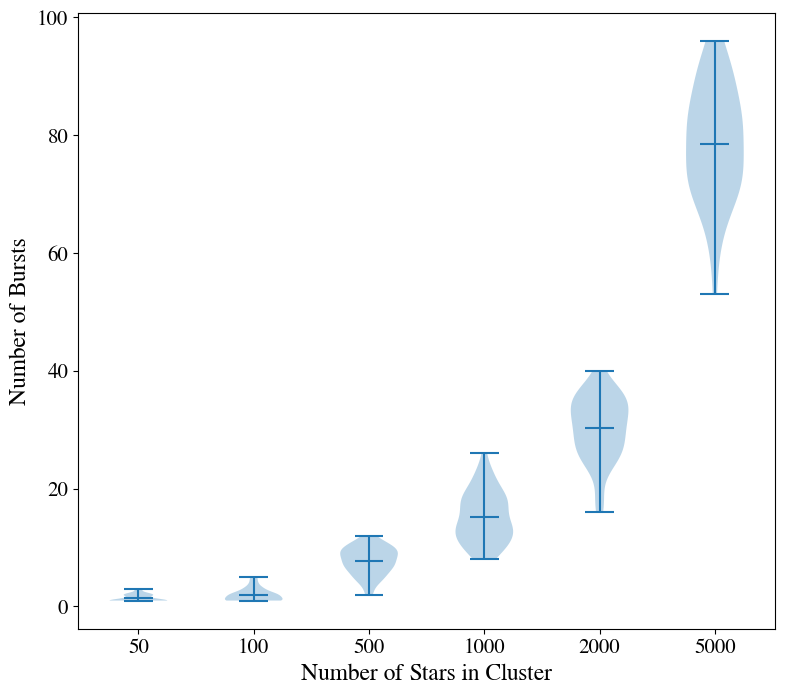

In [16]:
data_num_full=[num_new50_full,num_new100_full,num_new500_full,\
                num_new1000_full,num_new2000_full,num_new5000_full]

labels=[50,100,500,1000,2000,5000]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax.violinplot(data_num_full,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',fontsize=17)
ax.set_ylabel('Number of Bursts',fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#ax.set_title('Number of 100x Burst for Different Cluster Sizes (Any Time)',fontsize=15)
plt.plot()

/tmp/ipykernel_47810/1318186855.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
/tmp/ipykernel_47810/1318186855.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['0','50','100','500','1000','2000','5000'])


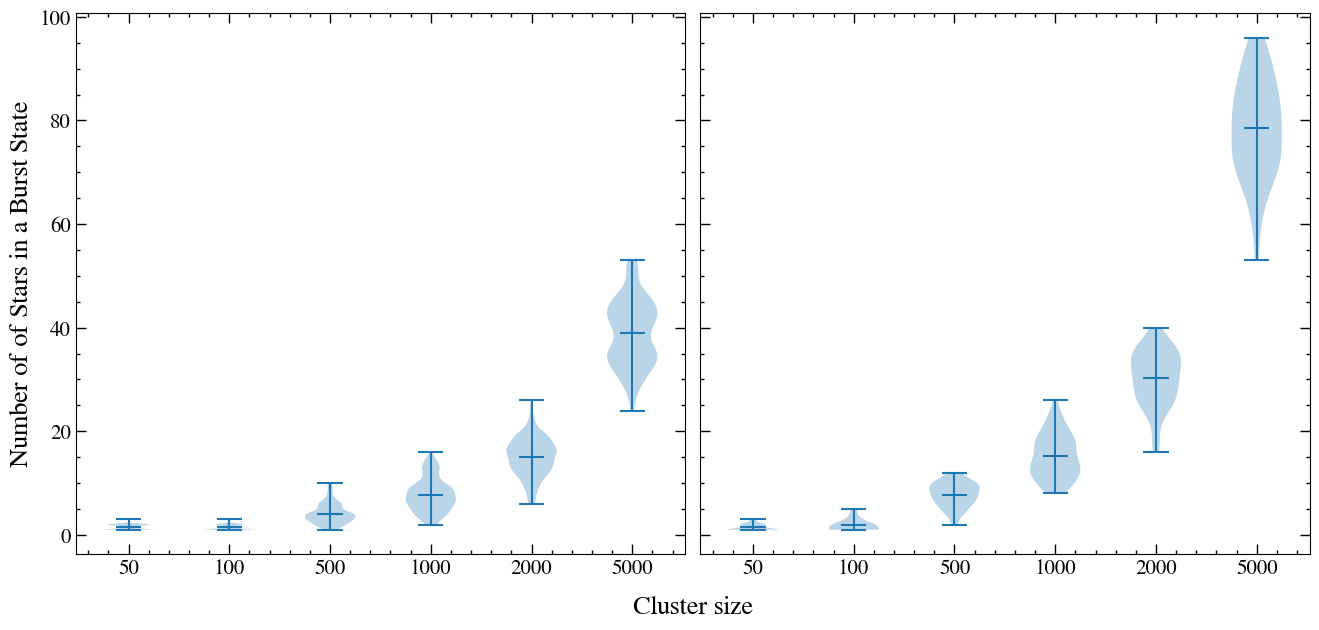

In [17]:
fig,((ax1,ax2))=plt.subplots(1,2,sharey='row',sharex='row')
fig.set_size_inches(13,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax1.violinplot(data_num_time,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax2.violinplot(data_num_full,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

#ax1.text(0.75,94,'Detected Bursts at Any Time',fontsize=16)
#ax2.text(0.75,94,'Detected Bursts in a Full Program',fontsize=16)

#ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=False,top=False,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
#ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
#ax2.minorticks_on()
ax2.locator_params(axis='y',nbins=6)
#ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
#ax2.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

fig.tight_layout()
#plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])

ax3=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax3.set_yticks([])
ax3.set_xticks([])
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax2.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax3.set_ylabel(r'Number of of Stars in a Burst State',fontsize=19,labelpad=30)
ax3.set_xlabel('Cluster size',fontsize=19,labelpad=30)

ax1.minorticks_on()
#ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)
ax2.minorticks_on()
#ax2.locator_params(axis='y',nbins=6)
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)

#ax1.set_yscale('log')
#ax2.set_yscale('log')

#plt.savefig('/home/lee/research/figs/SizeChange/violinplots/number/observing_runObs_100x_SidexSide.jpeg',dpi=300,bbox_inches='tight')
plt.show()

NameError: name 'data_num_2week' is not defined

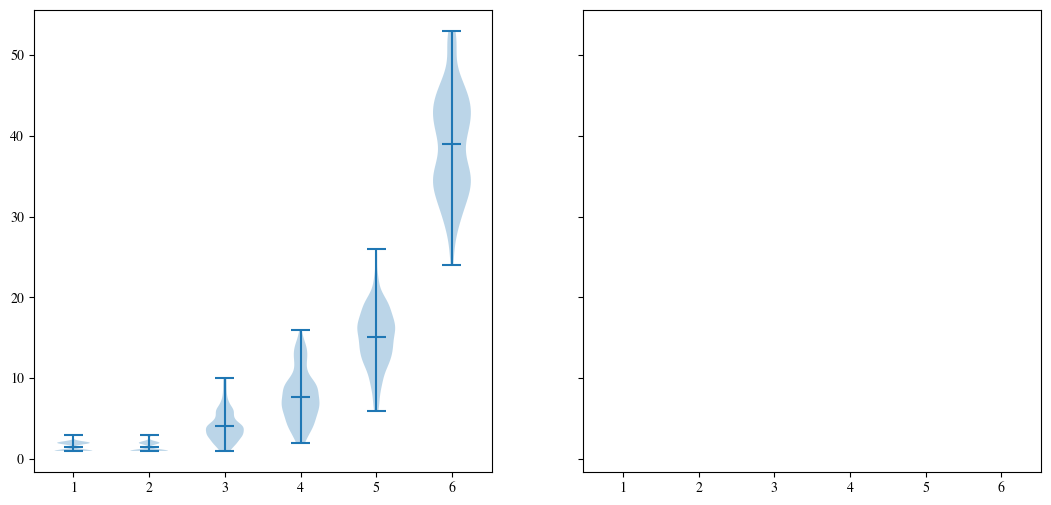

In [18]:
fig,((ax1,ax2))=plt.subplots(1,2,sharey='row',sharex='row')
fig.set_size_inches(13,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax1.violinplot(data_num_time,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax2.violinplot(data_num_2week,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax1.text(0.75,65,'Detectable Bursts at Any Time',fontsize=16)
ax2.text(0.75,65,'Total Bursts at Any Time',fontsize=16)

#ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=False,top=False,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
#ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
#ax2.minorticks_on()
ax2.locator_params(axis='y',nbins=6)
#ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
#ax2.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

fig.tight_layout()
#plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])

ax3=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax3.set_yticks([])
ax3.set_xticks([])
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax2.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax3.set_ylabel(r'Number of of Stars in a Burst State',fontsize=19,labelpad=30)
ax3.set_xlabel('Cluster size',fontsize=19,labelpad=30)

ax1.minorticks_on()
#ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)
ax2.minorticks_on()
#ax2.locator_params(axis='y',nbins=6)
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)

plt.savefig('/home/lee/research/figs/SizeChange/violinplots/number/AnyTime_100x_SidexSide.jpeg',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
fig,((ax1,ax2))=plt.subplots(1,2,sharey='row',sharex='row')
fig.set_size_inches(13,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax1.violinplot(data_num_full,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax2.violinplot(data_num,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax1.text(0.75,52,'Detectable Bursts in Full Program',fontsize=16)
ax2.text(0.75,52,'Total Bursts in Full Program',fontsize=16)

#ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=False,top=False,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
#ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
#ax2.minorticks_on()
ax2.locator_params(axis='y',nbins=6)
#ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=False,top=False,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
#ax2.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

fig.tight_layout()
#plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])

ax3=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax3.set_yticks([])
ax3.set_xticks([])
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax2.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax3.set_ylabel(r'Number of of Stars in a Burst State',fontsize=19,labelpad=30)
ax3.set_xlabel('Cluster size',fontsize=19,labelpad=30)

ax1.minorticks_on()
#ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)
ax2.minorticks_on()
#ax2.locator_params(axis='y',nbins=6)
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)

#plt.savefig('/home/lee/research/figs/SizeChange/violinplots/number/FullRun_100x_SidexSide.jpeg',dpi=300,bbox_inches='tight')
plt.show()

## just detectable bursts in full program

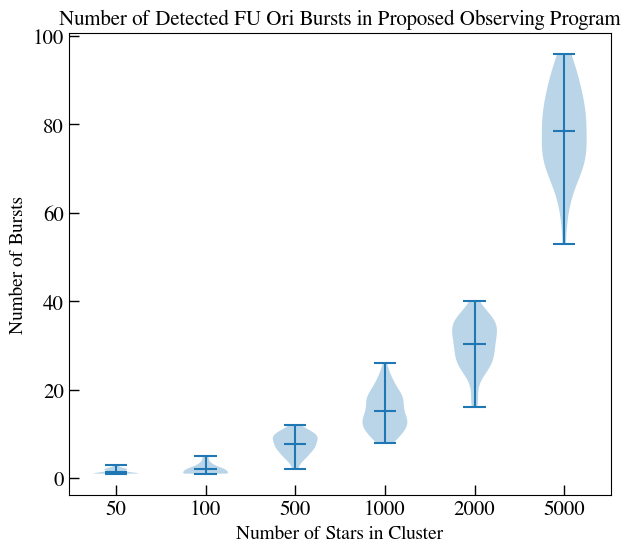

In [25]:
fig,ax=plt.subplots()
#fig.set_size_inches(9,8)
fig.set_size_inches(7,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax.violinplot(data_num_full,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax.locator_params(axis='y',nbins=6)
ax.tick_params(axis='both',right=False,top=False,which='both')
ax.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)

plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',fontsize=14)
ax.set_ylabel('Number of Bursts',fontsize=14)
#plt.xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.set_title('Number of Detected FU Ori Bursts in Proposed Observing Program',fontsize=15)
#plt.savefig('/home/lee/research/figs/SizeChange/violinplots/number/observing_runObs_100x_Program.jpeg',dpi=300,bbox_inches='tight')
plt.show()

In [67]:
print(np.mean(data_num_full[4]))
print(np.mean(data_num[4]))

print(np.mean(data_num_full[4])/np.mean(data_num[4]))

15.16
16.02
0.9463171036204744


/tmp/ipykernel_154340/2930269747.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['0','50','100','500','1000','2000','5000'])
/tmp/ipykernel_154340/2930269747.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['0','50','100','500','1000','2000','5000'])


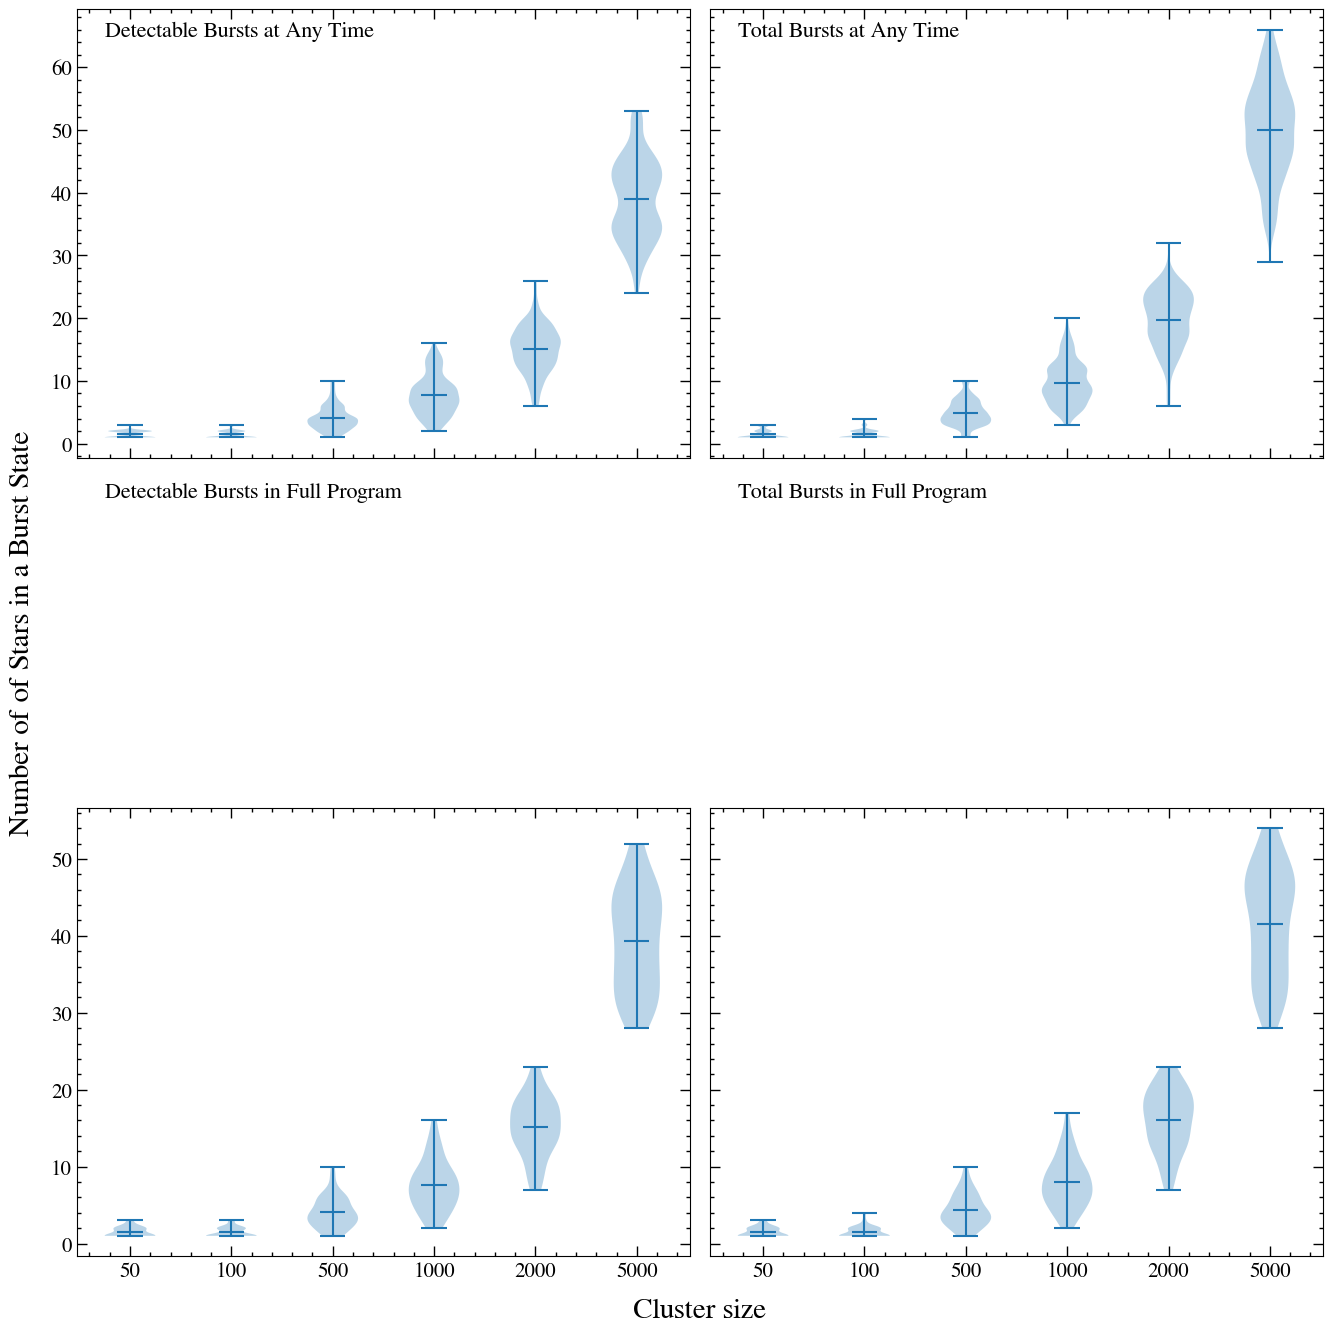

In [56]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharey='row',sharex='col')
fig.set_size_inches(13,13)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

ax1.violinplot(data_num_time,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax2.violinplot(data_num_2week,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax1.text(0.75,65,'Detectable Bursts at Any Time',fontsize=16)
ax2.text(0.75,65,'Total Bursts at Any Time',fontsize=16)

ax3.violinplot(data_num_full,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax4.violinplot(data_num,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)

ax3.text(0.75,97,'Detectable Bursts in Full Program',fontsize=16)
ax4.text(0.75,97,'Total Bursts in Full Program',fontsize=16)

fig.tight_layout()
#plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])

ax5=fig.add_subplot(111,frameon=False)
#plt.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off',which='both',axis='both')
plt.minorticks_off()
plt.grid(False)
ax5.set_yticks([])
ax5.set_xticks([])
ax3.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax4.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax5.set_ylabel(r'Number of of Stars in a Burst State',fontsize=21,labelpad=30)
ax5.set_xlabel('Cluster size',fontsize=21,labelpad=30)

ax1.minorticks_on()
#ax1.locator_params(axis='y',nbins=6)
ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)
ax2.minorticks_on()
#ax2.locator_params(axis='y',nbins=6)
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis='both',right=True,top=True,which='both')
ax2.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax2.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)
ax3.minorticks_on()
#ax3.locator_params(axis='y',nbins=6)
ax3.tick_params(axis='both',right=True,top=True,which='both')
ax3.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax3.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)
ax3.minorticks_on()
#ax4.locator_params(axis='y',nbins=6)
ax4.yaxis.set_ticks_position('both')
ax4.tick_params(axis='both',right=True,top=True,which='both')
ax4.tick_params(axis='both',which='major', length=7, width=1, direction='in',labelsize=15)
ax4.tick_params(axis='both',which='minor', length=3, width=1, direction='in',labelsize=15)

#ax1.set_yscale('log')
#ax2.set_yscale('log')
#ax3.set_yscale('log')
#ax4.set_yscale('log')

#plt.savefig('/home/lee/research/figs/SizeChange/violinplots/number/All_100x_SidexSide.jpeg',dpi=300,bbox_inches='tight')
plt.show()

## Missing

In [112]:
print(np.mean(num2000_list))
print(np.mean(list100_2000_total))

32.22
30.24


In [111]:
x500=(1-np.mean(list100_500_total)/np.mean(num500_list))*100
x1000=(1-np.mean(list100_1000_total)/np.mean(num1000_list))*100
x2000=(1-np.mean(list100_2000_total)/np.mean(num2000_list))*100
x5000=(1-np.mean(list100_5000_total)/np.mean(num5000_list))*100

print(x500,x1000,x2000,x5000)

5.8679706601466926 5.125000000000002 6.145251396648044 5.536831969186318


In [49]:
number0=0
size=2000
for i in range(len(list100_100_total)):
    if list100_100_total[i]==0:
        number0+=1

print(number0)

12


In [106]:
print(number0/len(list100_5000)*100)

6.363636363636363


In [109]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.98):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(list100_2000)

(15.052727272727273, 14.676067138883754, 15.429387406570791)

In [103]:
scipy.stats.ttest_ind(a=list100_2000, b=list100_1000, equal_var=True)

Ttest_indResult(statistic=34.63052777154492, pvalue=3.2154531231534115e-178)